Let $\, X_1,X_2,...,X_n \,$ be independent and indentically distributed (i.i.d.) random variables with mean $\, \mu \,$ and standard deviation $\, \sigma. \,$ Let

\begin{equation*}
    S_n = \sum_{i=1}^{n} X_i.
\end{equation*}

The central limit theorem (CLT) states that the distribution of a standardized version of the sum $\, S_n \,$ converges to a standard normal distribution $\, \mathcal{N}(0,1) \,$ as $\, n \rightarrow \infty. \,$

To standardize a variable, we subtract its mean from it and divide it by its standard deviation.

\begin{equation*}
    \mathbb{E}[S_n] = \mathbb{E} \left[\sum_{i=1}^{n} X_i \right] = \sum_{i=1}^{n} \mathbb{E}[X_i] = n \mu
\end{equation*}

Since $\, X_1,X_2,...,X_n \,$ are **independent** of each other, the variance of their sum is equal to the sum of their variances:

\begin{equation*}
    \text{Var}(S_n) = \text{Var} \left(\sum_{i=1}^{n} X_i \right) = \sum_{i=1}^{n} \text{Var}(X_i) = n \sigma^2
\end{equation*}

Standard deviation is the square root of variance: 

\begin{equation*}
    \text{sd}(S_n) = \sqrt{\text{Var}(S_n)} = \sqrt{n \sigma^2} = \sqrt{n} \sqrt{\sigma^2} = \sigma \sqrt{n}
\end{equation*}

Hence, the standardized sum that converges to $\, \mathcal{N}(0,1) \,$ as $\, n \rightarrow \infty \,$ is:

\begin{equation*}
    Z_n = \frac{S_n - n \mu}{\sigma \sqrt{n}} \overset{d}{\rightarrow} \mathcal{N}(0,1)
\end{equation*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def clt(n_samples, n, distr, l=None, a=None, b=None):
    """
    Args:
        n_samples: number of samples (rows, data points) to generate
        n: number of independent random variables to sum per sample
        distr: distribution to draw samples (support: uniform, exp, poisson)
        l: scale parameter for exp distr. and rate parameter for poisson distr.
        a: lower limit for uniform distribution
        b: upper limit for uniform distribution
    """
    assert distr in ['uniform', 'exp', 'poisson'], 'Distribution not supported'
    
    if distr == 'uniform':
        S_n = np.random.uniform(low=a, high=b, size=(n_samples, n)).sum(axis=1)    # Uniform(a,b)
        mu = (1/2) * (a+b)                    # Theoretical mean of Uniform(a,b)
        sigma = np.sqrt((1/12) * (b-a)**2)    # Theoretical sd of Uniform(0,1)
        
    elif distr == 'exp':
        S_n = np.random.exponential(scale=l, size=(n_samples, n)).sum(axis=1)    # Exp(scale=l)
        mu = 1/(1/l)                   # Theoretical mean of Exp(scale=l) (scale is the inverse of rate)
        sigma = np.sqrt(1/(1/l**2))    # Theoretical sd of Exp(scale=l)
        
    elif distr == 'poisson':
        S_n = np.random.poisson(lam=l, size=(n_samples, n)).sum(axis=1)    # Poisson(l)
        mu = l      # Theoretical mean of Poisson(l)
        sigma = l   # Theoretical sd of Poisson(l)
    
    # Standardize the sum S_n
    Z_n = (S_n - n * mu) / (sigma * np.sqrt(n))
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.hist(Z_n, bins=50, density=True, alpha=0.6, edgecolor='black')
    ax.set_xlabel('x')
    ax.set_ylabel('density')

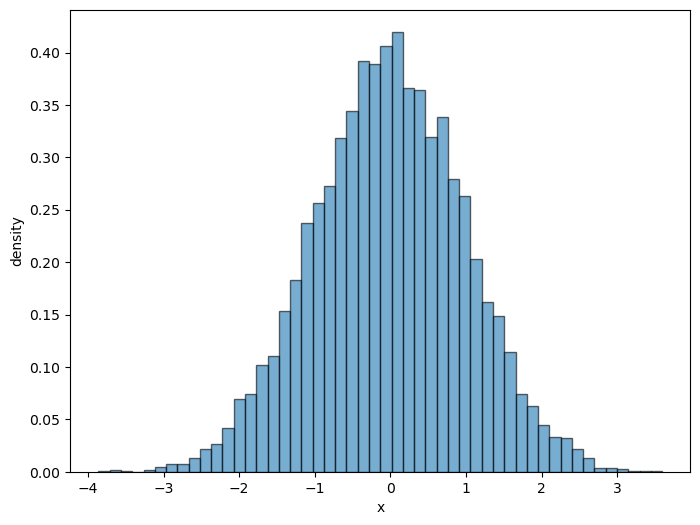

In [3]:
clt(n_samples=10000, n=10000, distr='uniform', a=5, b=100)

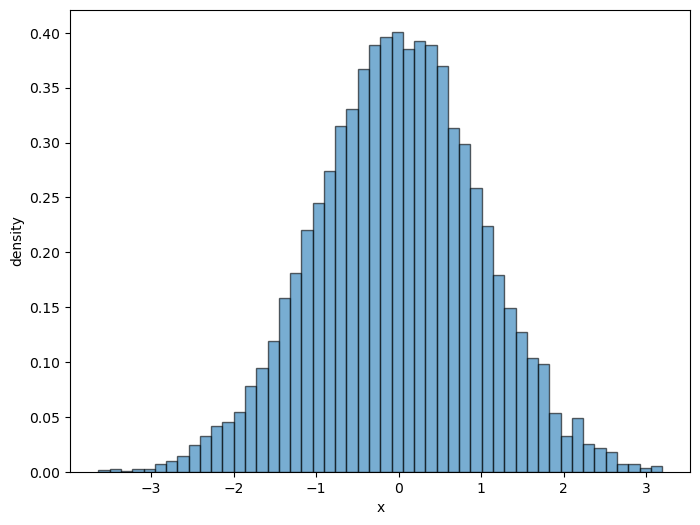

In [4]:
clt(n_samples=10000, n=10000, distr='exp', l=10)

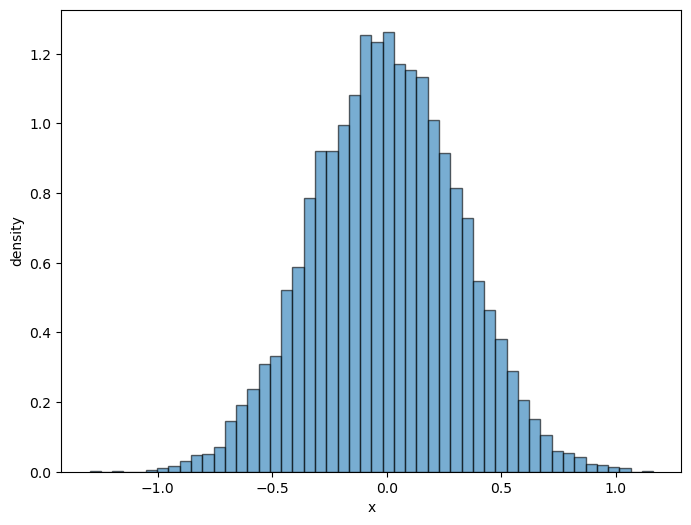

In [6]:
clt(n_samples=10000, n=10000, distr='poisson', l=10)